<a href="https://colab.research.google.com/github/Omar-Works/ID-2024/blob/main/test06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install -q tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [26]:
import os
import shutil
import random

# Define paths
train_dir = '/content/drive/MyDrive/Malaria/train'
val_dir = '/content/drive/MyDrive/Malaria/val'
test_dir = '/content/drive/MyDrive/Malaria/test'

# Define the categories (subdirectories inside train and val)
categories = ['Infected', 'Uninfected']

# Set the proportion of data to move to validation (e.g., 20% for validation)
validation_split = 0.2

# Loop through each category
for category in categories:
    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(val_dir, category)

    # Create validation category folder if it doesn't exist
    if not os.path.exists(val_category_dir):
        os.makedirs(val_category_dir)

    # Get all files in the category folder
    files = os.listdir(train_category_dir)

    # Shuffle the files to ensure randomness
    random.shuffle(files)

    # Calculate how many files to move (based on validation split)
    num_val_files = int(len(files) * validation_split)

    # Move the files to the validation directory
    for file in files[:num_val_files]:
        shutil.move(os.path.join(train_category_dir, file), os.path.join(val_category_dir, file))

print("Data split completed!")


Data split completed!


In [27]:
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling images
val_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling images for validation

# Training dataset
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malaria/train',  # Path to your training data
    target_size=(224, 224),  # VGG16 expects 224x224 input size
    batch_size=32,
    class_mode='binary'  # Binary classification: malaria vs non-malaria
)

# Validation dataset
val_data = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malaria/val',  # Path to your validation data
    target_size=(224, 224),  # VGG16 expects 224x224 input size
    batch_size=32,
    class_mode='binary'  # Binary classification
)


Found 333 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [28]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Set a learning rate (optional)
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=10,  # You can adjust the number of epochs as needed
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5881 - loss: 0.6772 - val_accuracy: 0.5469 - val_loss: 0.6663
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5938 - loss: 0.6572 - val_accuracy: 0.4737 - val_loss: 0.6795
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 194ms/step - accuracy: 0.5358 - loss: 0.6739 - val_accuracy: 0.5938 - val_loss: 0.6628
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5938 - loss: 0.6669 - val_accuracy: 0.6316 - val_loss: 0.6701
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.6084 - loss: 0.6672 - val_accuracy: 0.6250 - val_loss: 0.6654
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5625 - loss: 0.6795 - val_accuracy: 0.7368 - val_loss: 0.6403
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.6517 - loss: 0.6689 - val_accuracy: 0.6406 - val_loss: 0.6568
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6250 - loss: 0.6668 - val_accuracy: 0.7368 - 

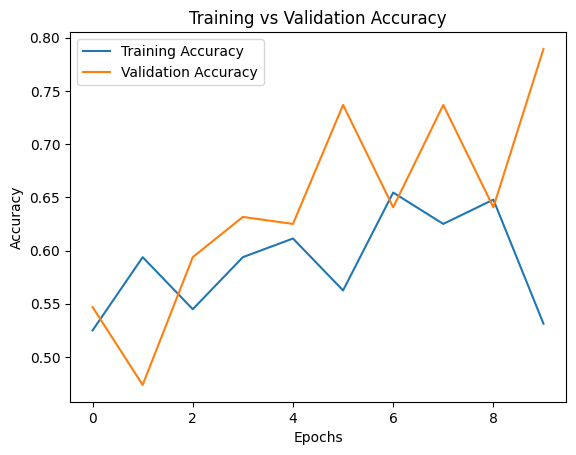

In [29]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [30]:
# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.6949 - loss: 0.6516
Validation Loss: 0.6497579216957092
Validation Accuracy: 0.6867470145225525


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess an example image
img = image.load_img('/path/to/image.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
print(prediction)


In [31]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Set the path to your test data
test_dir = '/content/drive/MyDrive/Malaria/test'

# Create ImageDataGenerator instance for the test data (no augmentation needed)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,           # You can change batch size depending on memory
    class_mode='binary',     # Use 'binary' since you have 2 classes (Infected/Uninfected)
    shuffle=False            # Don't shuffle for evaluation (so predictions match filenames)
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# If you want to predict individual images, you can loop through the test set
# Example for predicting a batch of images
predictions = model.predict(test_generator)

# Display predictions for the first batch of images
for i, prediction in enumerate(predictions):
    print(f"Image {i+1} prediction: {'Infected' if prediction[0] > 0.5 else 'Uninfected'} (Confidence: {prediction[0]:.2f})")


Found 134 images belonging to 2 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8251 - loss: 0.6529
Test accuracy: 66.42%
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step
Image 1 prediction: Uninfected (Confidence: 0.48)
Image 2 prediction: Uninfected (Confidence: 0.49)
Image 3 prediction: Uninfected (Confidence: 0.47)
Image 4 prediction: Uninfected (Confidence: 0.44)
Image 5 prediction: Uninfected (Confidence: 0.44)
Image 6 prediction: Uninfected (Confidence: 0.46)
Image 7 prediction: Uninfected (Confidence: 0.50)
Image 8 prediction: Uninfected (Confidence: 0.46)
Image 9 prediction: Uninfected (Confidence: 0.48)
Image 10 prediction: Uninfected (Confidence: 0.48)
Image 11 prediction: Uninfected (Confidence: 0.47)
Image 12 prediction: Uninfected (Confidence: 0.45)
Image 13 prediction: Uninfected (Confidence: 0.49)
Image 14 prediction: Uninfected (Confidence: 0.48)
Image 15 prediction: Uninfected (Confidence: 0.47)
Image 16 prediction: Uninfected (Confidence: 0.46)
Image 17 predictio